# **Hotel Booking Final Project**

### **Dataset Overview:**
The dataset hotel_bookings.csv contains comprehensive information about hotel booking records, showcasing various aspects of customer bookings for hotels. It encompasses data points such as booking status, customer details, stay duration, and financial aspects.

### **Problem Statement:**

### **Data Analytics:**
* Stakeholder: OTA (Online Travel Agency)
* Problem: How can OTA aid in increasing revenue for its lodging partner?
* Reasoning: To enchance partnership with lodging partners, improve revenue stream and modify average daily rate strategically
* Goal: Increase revenue through improved strategic average daily rate modification
* Benefit of analysis: OTA and its lodging partners can more effectively strategize pricing for their accomodations and potential marketing promotions

  * Macro Analysis: What are the impacts of the various hotel booking attributes with regards to average daily rate?
    * Micro Analysis:
      * What is the impact of amount of people staying with regards to average daily rate?
      * What is the impact of available facility (room type, meal order, special request) with regards to average daily rate?
      * What is the impact of month selection/season with regards to average daily rate?
      * When is a good time to give promotions?
  * Expected outcome:
       * Identify impact of the various attributes and identify what strategies can potentially be implemented to improve average daily rate

In [5]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np

## Load Clean Dataset

In [6]:
data = pd.read_csv('cleaned_hotel_bookings.csv')

## Data Analysis

### ADR by Hotel Type

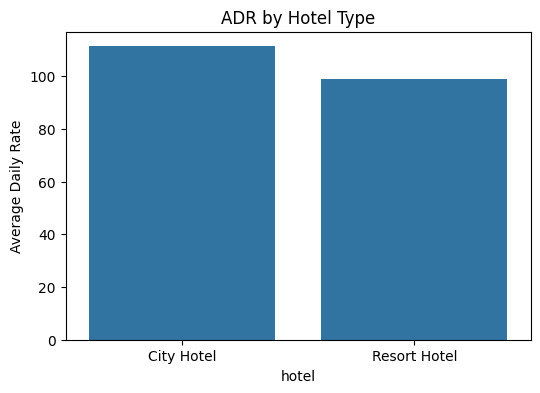

hotel
City Hotel      111.271904
Resort Hotel     99.059517
Name: adr, dtype: float64

In [7]:
# ADR by Hotel Type
adr_by_hotel_type = data.groupby('hotel')['adr'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=adr_by_hotel_type.index, y=adr_by_hotel_type.values)
plt.title('ADR by Hotel Type')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_hotel_type



Key Findings:

* City Hotel: The average daily rate (ADR) is approximately $110.99.
* Resort Hotel: The ADR is around $99.03.
* Insight: City Hotels tend to have a higher ADR compared to Resort Hotels. This could be due to their location, amenities, target clientele, or a combination of these factors.

### What is the impact of amount of people staying with regards to average daily rate?

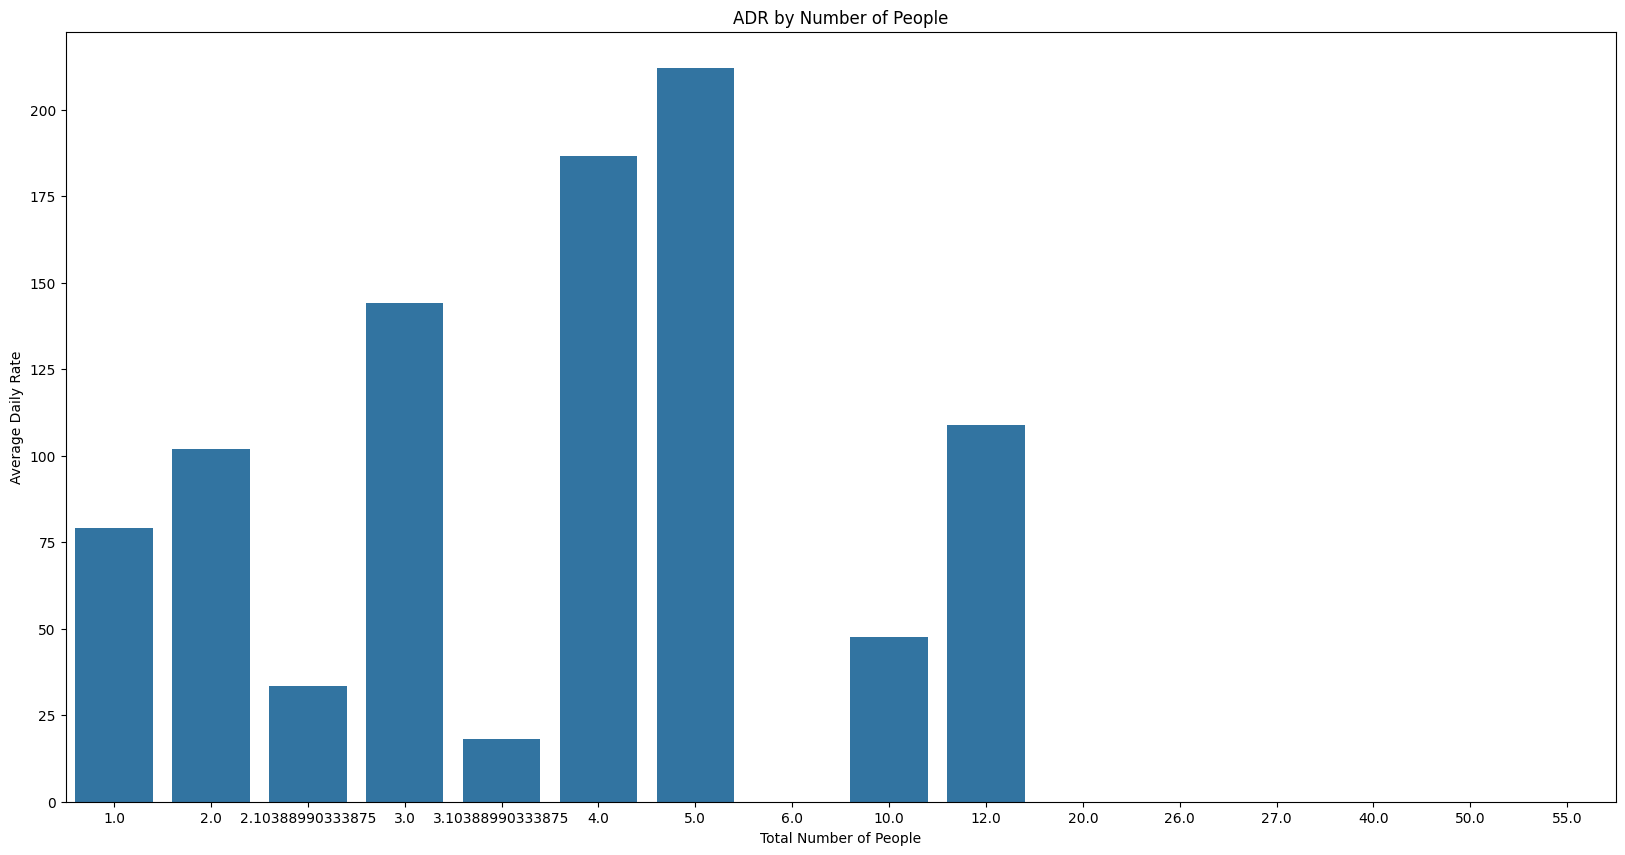

total_people
1.00000      78.994162
2.00000     101.978231
2.10389      33.500000
3.00000     144.098620
3.10389      18.000000
4.00000     186.640377
5.00000     211.974191
6.00000       0.000000
10.00000     47.500000
12.00000    108.805000
20.00000      0.000000
26.00000      0.000000
27.00000      0.000000
40.00000      0.000000
50.00000      0.000000
55.00000      0.000000
Name: adr, dtype: float64

In [8]:
# ADR by Number of People
adr_by_people_count = data.groupby('total_people')['adr'].mean()
plt.figure(figsize=(20, 10))
sns.barplot(x=adr_by_people_count.index, y=adr_by_people_count.values)
plt.title('ADR by Number of People')
plt.xlabel('Total Number of People')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_people_count

Key Findings:
* The Average Daily Rate peaks at a group size labeled as "3.0".
* The second-highest rate is for a group size labeled as "4.0".
* ADR declines for "5.0" and significantly more for "6.0".
* There is an increase in ADR for larger groups labeled "10.0", "20.0", and "26.0".
* The ADR drops again at a group size labeled "50.0".

### What is the impact of available facility (room type, meal order, special request) with regards to average daily rate?

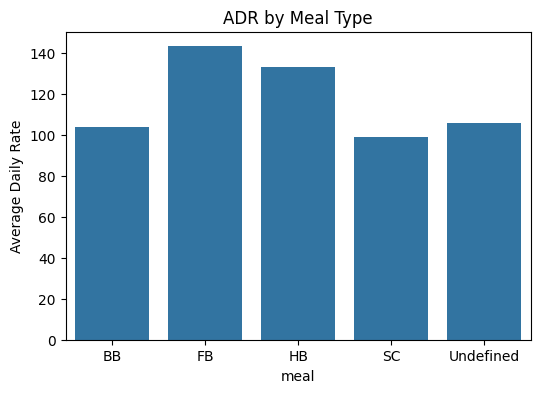

meal
BB           103.772829
FB           143.293667
HB           133.346023
SC            99.054499
Undefined    105.811850
Name: adr, dtype: float64

In [9]:
# ADR by Meal Type
adr_by_meal_type = data.groupby('meal')['adr'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=adr_by_meal_type.index, y=adr_by_meal_type.values)
plt.title('ADR by Meal Type')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_meal_type

Key Findings:
* BB (Bed & Breakfast): ADR is approximately $103.67.
* FB (Full Board): Highest ADR at around $143.29.
* HB (Half Board): ADR is about $133.27.
* SC (Self Catering): The lowest ADR at $98.28.
* Undefined: ADR is around $105.81.
* Insight: Full Board and Half Board meal options are associated with higher ADRs. This suggests that guests opting for more inclusive meal plans tend to spend more on their accommodation. In contrast, the Self Catering option, which likely appeals to budget-conscious travelers, shows the lowest ADR.

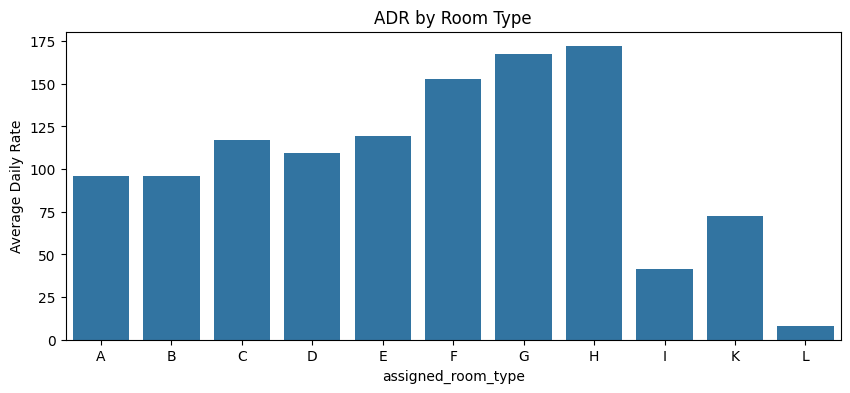

assigned_room_type
A     95.908058
B     95.842479
C    117.171481
D    109.129206
E    119.278137
F    152.870074
G    167.546020
H    171.881530
I     41.264278
K     72.410919
L      8.000000
Name: adr, dtype: float64

In [10]:
# ADR by Room Type
adr_by_room_type = data.groupby('assigned_room_type')['adr'].mean()
plt.figure(figsize=(10, 4))
sns.barplot(x=adr_by_room_type.index, y=adr_by_room_type.values)
plt.title('ADR by Room Type')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_room_type

Key Findings:

* Room types A, B, C, D, E have ADRs ranging from around $95 to $119.
* Higher-end room types like F, G, and H have significantly higher ADRs, with room type H having the highest ADR at approximately $171.88.
* Lower ADRs are observed for room types I, K, L, and P, with P having an ADR of $0.00 (which could indicate a data entry issue or a specific promotional offer).
* Insight: There's a clear indication that more luxurious or premium room types (F, G, H) command higher rates. This suggests that guests are willing to pay more for enhanced amenities, space, or views offered by these room types.

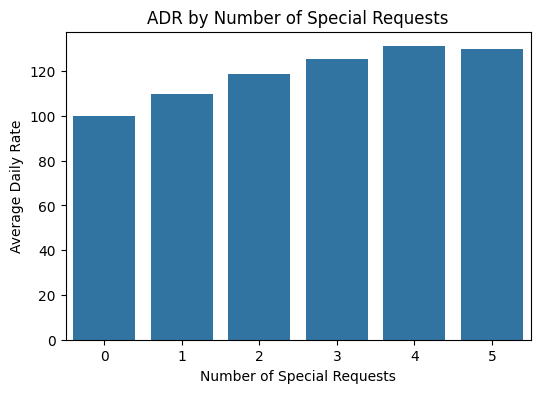

total_of_special_requests
0     99.886277
1    109.785310
2    118.699924
3    125.232939
4    131.088687
5    129.980000
Name: adr, dtype: float64

In [11]:
# ADR by Number of Special Requests
adr_by_special_requests = data.groupby('total_of_special_requests')['adr'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=adr_by_special_requests.index, y=adr_by_special_requests.values)
plt.title('ADR by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_special_requests

Key Findings:

* The average daily rate (ADR) increases with the number of special requests made by guests.
* For guests with no special requests, the ADR is around $99.67, and it progressively increases up to $131.09 for guests with four special requests.
* Interestingly, the ADR slightly decreases for guests with five special requests.
* Insight: This trend suggests that guests willing to pay higher rates are also more likely to request additional services or have specific requirements, indicating a correlation between willingness to spend and the desire for a tailored experience. However, the slight decrease for five special requests might be an anomaly or could reflect specific packages or deals.

### What is the impact of month selection/season with regards to average daily rate?

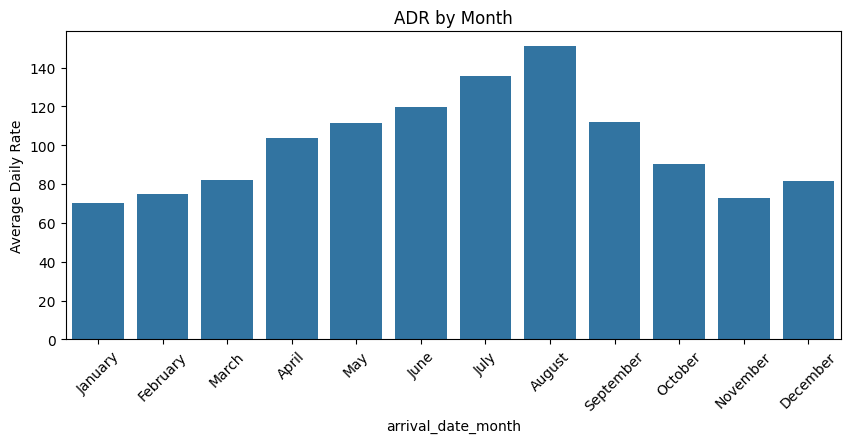

arrival_date_month
January       70.164448
February      74.860398
March         81.857868
April        103.700239
May          111.306131
June         119.864477
July         135.712492
August       151.055295
September    112.211672
October       90.321855
November      72.968506
December      81.743142
Name: adr, dtype: float64

In [12]:
# ADR by Month
# Sorting months in calendar order for better understanding
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
adr_by_month = data.groupby('arrival_date_month')['adr'].mean().reindex(months_order)

plt.figure(figsize=(10, 4))
sns.barplot(x=adr_by_month.index, y=adr_by_month.values)
plt.xticks(rotation=45)
plt.title('ADR by Month')
plt.ylabel('Average Daily Rate')
plt.show()

adr_by_month

Key Findings:

* The ADR varies significantly throughout the year, with the highest rates in August ($150.88) and July ($135.54), which are typically peak tourist seasons.
* The lowest ADRs are observed in the winter months, specifically January ($70.05) and February ($74.69).
* Insight: This seasonal trend suggests higher demand and pricing during the summer months, particularly in July and August. The lower rates in winter months indicate a potential off-peak period where occupancy might be lower.



### When is a good time to give promotions?

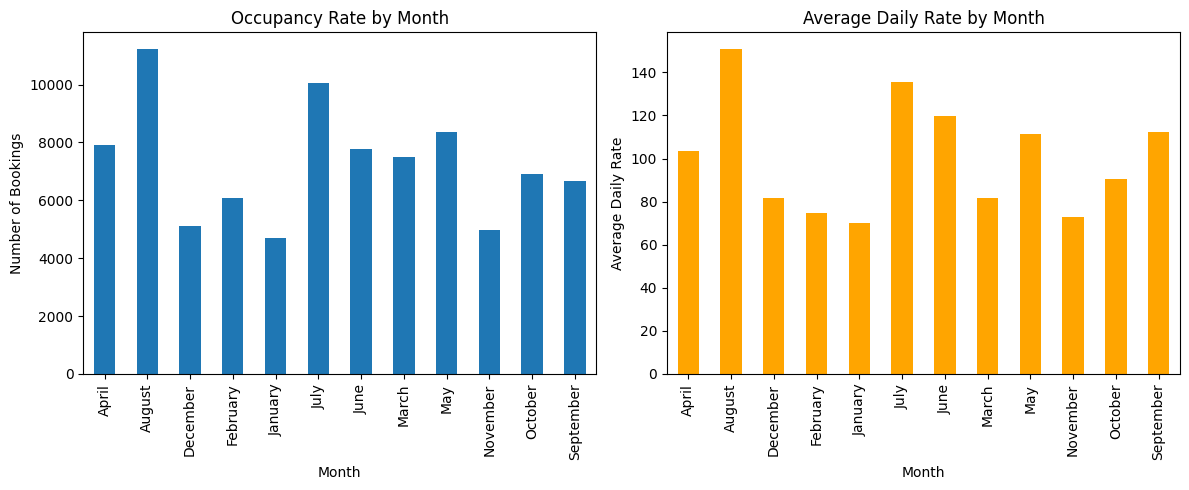

In [13]:
# Assuming 'cleaned_df' is the cleaned dataset

# Calculate the occupancy rate by month
# For simplicity, assuming every row in the dataset represents a booked room
monthly_occupancy = data.groupby('arrival_date_month')['hotel'].count()

# Calculate the average daily rate by month
monthly_adr = data.groupby('arrival_date_month')['adr'].mean()

# Plotting the results for visual comparison
plt.figure(figsize=(12, 5))

# Plot for Occupancy Rate by Month
plt.subplot(1, 2, 1)
monthly_occupancy.plot(kind='bar')
plt.title('Occupancy Rate by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# Plot for ADR by Month
plt.subplot(1, 2, 2)
monthly_adr.plot(kind='bar', color='orange')
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')

plt.tight_layout()
plt.show()


**Key Findings:**

**Occupancy Rate by Month**:
- The occupancy rate graph shows the number of bookings for each month. Higher bars indicate more bookings, typically reflecting higher demand.

**Average Daily Rate (ADR) by Month**:
- The ADR graph reflects the average price per room for each month. Variations in ADR can indicate changes in demand or pricing strategies.

### Key Insights:
1. **Low Occupancy Periods**: Months with lower occupancy (fewer bookings) are potential targets for promotional offers. Promotions during these times can help increase occupancy rates.

2. **ADR and Occupancy Correlation**: Months with lower ADRs, especially when combined with lower occupancy rates, are ideal for promotions. The goal is to boost demand, thus potentially increasing the occupancy rate without significantly lowering the ADR.

3. **Seasonal Trends**: If certain months consistently show lower occupancy and ADR (like winter months), these are prime candidates for promotions. Conversely, months with high occupancy and ADR (like summer months) might not need promotions.

### Strategic Promotion Suggestions:
1. **Target Low Occupancy Months**: Promotions in months with low occupancy can attract guests who might otherwise not book, especially during off-peak seasons.

2. **Customized Promotions**: Tailor promotions to the type of guests likely to travel during these lower occupancy months. For example, offering family packages during school breaks or special rates for business travelers during quieter business periods.

3. **Advance Booking Promotions**: Encourage advance bookings during anticipated low occupancy periods by offering early bird discounts.

4. **Special Event Promotions**: If certain low occupancy periods coincide with local events or holidays, promotions themed around these could attract guests.

5. **Loyalty and Return Guest Offers**: During low seasons, offering special rates or perks to returning guests or loyalty program members can help maintain a steady flow of occupancy.

By aligning promotional strategies with these insights, hotels can effectively increase occupancy rates during low-demand periods while maintaining a balanced ADR.

## **Conclusion**

- Both City and Resort Hotels exhibit comparable Average Daily Rates (ADR).
- The ADR reaches its peak with groups of 3, 4, or 5 individuals per accommodation.
- The greatest contributions to ADR come from guests selecting Full Board & Half Board meal options.
- Premium room types such as F, G, and H command notably higher ADRs, with room type H achieving the top ADR at roughly $171.88.
- Room types I, K, L, and P have lower ADRs, with type P registering an ADR of $0.00, which may reflect an error or a special deal.
- Guests without any special requests have an ADR of about $99.67, which increases incrementally to $131.09 for those with four special requests.
- Notably, there is a minor reduction in ADR for guests with five special requests.
- ADR fluctuates significantly over the year, peaking in August ($150.88) and July ($135.54), coinciding with the high season for tourism.
- The minimal ADRs occur during the winter, specifically in January ($70.05) and February ($74.69).
- Insight: The evident seasonality indicates a surge in pricing and demand during summer, especially in July and August, and a dip in the winter months, suggesting a potential low season.
- Promotional Opportunity in Low Occupancy Periods: Months showing reduced bookings could benefit from marketing campaigns to boost occupancy rates.
- Strategy for ADR and Occupancy: Months marked by lower ADRs and bookings are optimal for promotions aimed at increasing demand, thus potentially raising occupancy without a significant compromise on ADR.
- Seasonal Trends: Months that consistently exhibit low occupancy and ADR, such as the winter period, are ideal for promotional activities. In contrast, periods like the summer months that register high occupancy and ADR may not necessitate promotions.


## **Strategy Suggestion**

1. **Targeted Room Upgrades**: Since higher-end room types (F, G, H) have higher ADRs, encourage upgrades through targeted offers, perhaps by offering discounted upgrades to guests who book standard rooms or by providing loyalty program members with special upgrade rates.

2. **Optimize Group Bookings**: Given that ADR peaks with groups of 3 to 5, create tailored packages for small groups that could include special rates, amenities, or services, incentivizing group stays and maximizing revenue per available room.

3. **Meal Plan Adjustments**: With Full Board and Half Board meals contributing significantly to ADR, consider revising meal plan pricing strategies or offering special meal plan upgrades at the point of booking or check-in to increase overall spend.

4. **Review Room Pricing Structure**: Analyze and adjust the pricing structure of room types I, K, L, and P, which have lower ADRs. Investigate the cause of room type P's ADR of $0.00 and rectify any potential data entry errors or evaluate the effectiveness of any promotional offers that might be in place.

5. **Special Request Upselling**: As ADR increases with the number of special requests up to four, train staff to upsell additional services that can be perceived as special requests. Implement a system to suggest add-ons that cater to guest preferences, increasing both guest satisfaction and ADR.

6. **Seasonal Rate Management**: Capitalize on high-demand months (July and August) by adjusting rates according to forecasted occupancy and demand patterns. For the low-demand winter months, consider implementing dynamic pricing strategies to attract guests without drastically lowering rates.

7. **Promotional Campaigns During Low Seasons**: Develop and market promotional offers during months with traditionally lower occupancy and ADR (January and February) to attract more bookings. These could include special event packages, limited-time offers, or inclusive deals that bundle rooms with other services.

8. **Leverage Local Events**: Identify local events, conferences, and conventions throughout the year, and create targeted promotions or packages to attract attendees, thus increasing occupancy and potentially ADR during those periods.

9. **Loyalty Programs**: Enhance loyalty programs to encourage repeat stays. Offer members exclusive rates, early check-in/late check-out privileges, room upgrades, or points that can be redeemed for meals or other hotel services.

10. **Marketing Focus on Unique Selling Points (USPs)**: Emphasize the hotel's USPs in marketing campaigns. Whether it's a prime location, exceptional service, unique amenities, or environmental sustainability initiatives, highlighting these factors can justify higher room rates and improve ADR.

11. **Data-Driven Revenue Management**: Utilize a revenue management system to gather data and generate insights on booking patterns, price sensitivity, and guest preferences, allowing for informed decisions on room pricing and promotional strategies.

By employing a combination of these strategies, the hotels can work towards improving their ADR while maintaining guest satisfaction and market competitiveness.
